In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = './data/spam.csv'
df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.rename(columns={'v1':'label', 'v2': 'message'}, inplace=True)
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
df['label_number'] = df['label'].map({'ham':0, 'spam': 1})
df.tail()

,label,message,label_number
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [8]:
df['message_length'] = df['message'].apply(len)
df.tail()

,label,message,label_number,message_length
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125
5571,ham,Rofl. Its true to its name,0,26


Text(0.5, 0, 'Message Length')

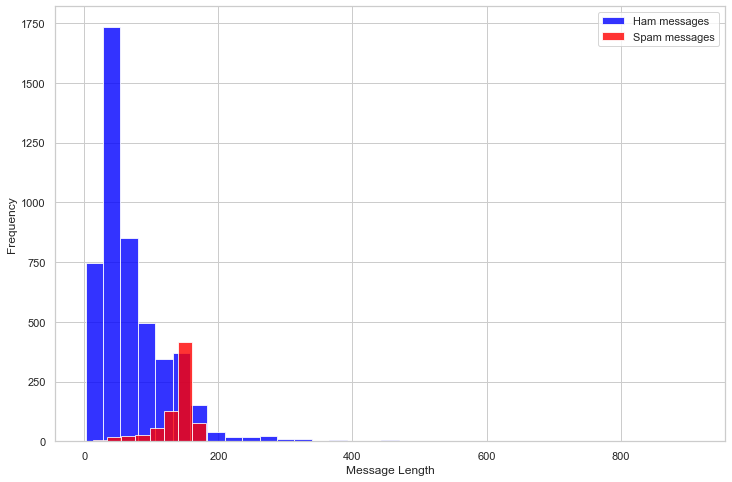

In [9]:
plt.figure(figsize=(12, 8))

df[df['label']=='ham']['message_length'].plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.8)
df[df['label']=='spam']['message_length'].plot(kind='hist', color='red', label='Spam messages', alpha=0.8)
plt.legend()
plt.xlabel("Message Length")

In [10]:
df[df['label']=='spam'].describe()

,label_number,message_length
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [11]:
df[df['message_length'] == 224]['message'].iloc[0]

'Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen'

In [12]:
import nltk
nltk.download('stopwords')
nltk.download("names")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\euise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\euise\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.corpus import names

In [14]:
all_names = set(names.words())

In [15]:
import string
def clean_text(mess):
    stop_words = stopwords.words('english')
    del_punctuation = [char for char in mess if char not in string.punctuation]
    del_punctuation = ''.join(del_punctuation)
    
    return ' '.join([word for word in del_punctuation.split() if word.lower() not in (stop_words and all_names)])

In [16]:
df['clean_msg'] = df.message.apply(clean_text)

In [17]:
df.tail()

,label,message,label_number,message_length,clean_msg
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,Will Ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity was in mood for that Soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,The guy did some bitching but I acted like id ...
5571,ham,Rofl. Its true to its name,0,26,Rofl Its true to its name


In [18]:
from collections import Counter

words = df[df['label']=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(30))

[('i', 2185), ('you', 1837), ('to', 1554), ('the', 1118), ('a', 1052), ('u', 972), ('and', 848), ('in', 811), ('me', 756), ('my', 743), ('is', 728), ('it', 590), ('of', 524), ('for', 501), ('that', 486), ('im', 449), ('have', 438), ('but', 418), ('your', 414), ('so', 412), ('are', 409), ('not', 406), ('on', 391), ('at', 377), ('do', 377), ('can', 376), ('if', 347), ('will', 334), ('be', 332), ('2', 305)]


In [19]:
words = df[df['label']=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(30))

[('to', 686), ('a', 376), ('call', 347), ('you', 287), ('your', 263), ('free', 216), ('the', 204), ('for', 203), ('now', 189), ('or', 188), ('2', 173), ('is', 158), ('txt', 150), ('u', 147), ('on', 144), ('ur', 144), ('have', 135), ('from', 128), ('mobile', 123), ('and', 122), ('text', 120), ('4', 119), ('claim', 113), ('stop', 113), ('with', 109), ('reply', 101), ('of', 95), ('prize', 92), ('this', 87), ('our', 85)]


stopword에 포함되어야할 것 같은 단어들 [u, im, 2, ur, 4, n, r, i]

In [20]:
X = df['clean_msg']
y = df['label_number']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4179,), (1393,), (4179,), (1393,))

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()

In [27]:
X_train_docs = vectorizer.fit_transform(X_train)
X_test_docs = vectorizer.transform(X_test)

In [28]:
print(X_train_docs[0])
print('\n')
print(X_test_docs[0])

  (0, 5093)	1
  (0, 955)	1
  (0, 7547)	1
  (0, 7575)	1
  (0, 5436)	1
  (0, 6301)	1


  (0, 935)	1
  (0, 2380)	1
  (0, 2904)	1
  (0, 3224)	1
  (0, 3837)	1
  (0, 4461)	1
  (0, 6523)	1
  (0, 7128)	1
  (0, 7289)	1


In [29]:
X_train_docs.toarray()
X_test_docs.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
naive_bayes = MultinomialNB(alpha=1, fit_prior=True)

In [32]:
naive_bayes.fit(X_train_docs, y_train)

MultinomialNB(alpha=1)

In [33]:
y_pred = naive_bayes.predict(X_test_docs)

In [34]:
naive_bayes.score(X_test_docs, y_test)

0.9813352476669059

In [35]:
y_pred_proba = naive_bayes.predict_proba(X_test_docs)
y_pred_proba

array([[9.99997119e-01, 2.88068619e-06],
       [9.99999969e-01, 3.13169224e-08],
       [9.99559014e-01, 4.40985509e-04],
       ...,
       [9.89971478e-01, 1.00285223e-02],
       [9.99981195e-01, 1.88047522e-05],
       [1.00000000e+00, 2.03424303e-10]])

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

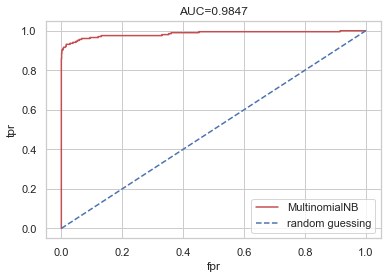

In [37]:
fpr, tpr, _ =roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0, 1], [0, 1], "b--", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {
    'alpha': [0.3, 0.6, 0.9, 1.2, 1.5, 1.8],
    'fit_prior': [True, False]
}

In [40]:
grid_search = GridSearchCV(naive_bayes, parameters, n_jobs=-1, cv=12, scoring="roc_auc")

In [41]:
grid_search.fit(X_train_docs, y_train)

GridSearchCV(cv=12, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': [0.3, 0.6, 0.9, 1.2, 1.5, 1.8],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [42]:
grid_search.best_params_

{'alpha': 0.3, 'fit_prior': True}

In [43]:
naive_bayes_best = grid_search.best_estimator_

In [44]:
y_pred_proba = naive_bayes_best.predict_proba(X_test_docs)
y_pred_proba

array([[9.99999861e-01, 1.38635904e-07],
       [9.99999997e-01, 2.74022359e-09],
       [9.99957205e-01, 4.27953346e-05],
       ...,
       [9.91782379e-01, 8.21762129e-03],
       [9.99998694e-01, 1.30582367e-06],
       [1.00000000e+00, 4.04222296e-12]])

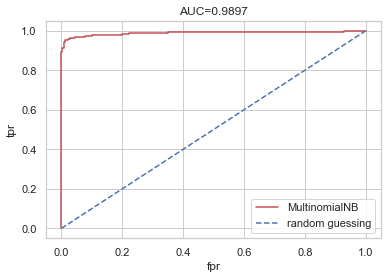

In [45]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0, 1], [0, 1], "b--", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()